In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
import precision_recall_cutoff
import Feature_Importance_Funs

# reading updated train dataset
train = pd.read_csv('train_dataset.csv')
train = train.dropna()
train.shape

(1879, 41)

In [2]:
train.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,interaction_1,interaction_2,interaction_3,interaction_4,average_seconds_per_item,trustLevel_1,trustLevel_2,trustLevel_3,trustLevel_4,trustLevel_5,trustLevel_6,totalScanTimeInSeconds_0_1,grandTotal_0_1,lineItemVoids_0_1,scansWithoutRegistration_0_1,quantityModifications_0_1,scannedLineItemsPerSecond_0_1,valuePerSecond_0_1,lineItemVoidsPerPosition_0_1,average_seconds_per_item_01,Labels,Labels_0,Labels_1,Labels_2,Labels_3,Labels_4,Labels_5,interaction_5,interaction_6,interaction_7,interaction_8
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0,0,0,0,1,19.27,0,0,0,0,1,0,0.575178,0.547174,0.636364,0.0,0.6,0.004045,0.001370,0.021944,0.000131,1,0,1,0,0,0,0,0.000000,0.002427,0.314722,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0,0,0,0,1,3.95,0,0,1,0,0,0,0.057955,0.273637,0.454545,0.2,0.8,0.019364,0.006689,0.032468,0.000027,3,0,0,0,1,0,0,0.090909,0.015491,0.015859,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,0,0,0,1,24.39,0,0,1,0,0,0,0.827775,0.621811,0.272727,1.0,1.0,0.001204,0.001083,0.020979,0.000165,5,0,0,0,0,0,1,0.272727,0.001204,0.514719,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0,0,0,0,1,19.40,0,0,0,0,0,1,0.978130,0.923462,0.727273,0.4,0.8,0.002347,0.001361,0.025078,0.000132,2,0,0,1,0,0,0,0.290909,0.001877,0.903266,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,0,0,0,1,5.27,0,0,0,0,1,0,0.234008,0.815608,0.272727,0.7,0.4,0.009337,0.005007,0.010101,0.000036,0,1,0,0,0,0,0,0.190909,0.003735,0.190858,0


In [3]:
train.columns

Index(['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids',
       'scansWithoutRegistration', 'quantityModifications',
       'scannedLineItemsPerSecond', 'valuePerSecond',
       'lineItemVoidsPerPosition', 'fraud', 'interaction_1', 'interaction_2',
       'interaction_3', 'interaction_4', 'average_seconds_per_item',
       'trustLevel_1', 'trustLevel_2', 'trustLevel_3', 'trustLevel_4',
       'trustLevel_5', 'trustLevel_6', 'totalScanTimeInSeconds_0_1',
       'grandTotal_0_1', 'lineItemVoids_0_1', 'scansWithoutRegistration_0_1',
       'quantityModifications_0_1', 'scannedLineItemsPerSecond_0_1',
       'valuePerSecond_0_1', 'lineItemVoidsPerPosition_0_1',
       'average_seconds_per_item_01', 'Labels', 'Labels_0', 'Labels_1',
       'Labels_2', 'Labels_3', 'Labels_4', 'Labels_5', 'interaction_5',
       'interaction_6', 'interaction_7', 'interaction_8'],
      dtype='object')

In [4]:
# Selecting input and target variables
X = train.drop(['fraud'], axis = 1)
Y = train['fraud']

nsim = 100
cv = 5
test = Feature_Importance_Funs.RF_Feature_Importance(X, Y, nsim, cv)

In [5]:
feature_importance = pd.DataFrame({'Features': X.columns, 'Importance': test.apply(np.mean, axis = 0)})
feature_importance['Importance'] = round(feature_importance['Importance'], 4) * 100
feature_importance = feature_importance.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)
feature_importance.head(3)

,Features,Importance
0,interaction_1,19.52
1,trustLevel,12.81
2,trustLevel_1,12.49


In [6]:
## Engineering features using the strong heredity principle
train['heredity_1'] = train['interaction_1'] * train['trustLevel']

train['heredity_2'] = train['interaction_1'] * train['Labels']

train['heredity_3'] = train['trustLevel'] * train['Labels']

[Text(639.375, 951.3000000000001, 'interaction_1 <= 0.5\ngini = 0.104\nsamples = 1503\nvalue = [1420, 83]'),
 Text(348.75, 679.5, 'interaction_7 <= 0.928\ngini = 0.022\nsamples = 1321\nvalue = [1306, 15]'),
 Text(232.5, 407.70000000000005, 'trustLevel_2 <= 0.5\ngini = 0.02\nsamples = 1319\nvalue = [1306, 13]'),
 Text(116.25, 135.89999999999998, 'gini = 0.002\nsamples = 1040\nvalue = [1039, 1]'),
 Text(348.75, 135.89999999999998, 'gini = 0.082\nsamples = 279\nvalue = [267, 12]'),
 Text(465.0, 407.70000000000005, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(930.0, 679.5, 'totalScanTimeInSeconds_0_1 <= 0.544\ngini = 0.468\nsamples = 182\nvalue = [114, 68]'),
 Text(697.5, 407.70000000000005, 'lineItemVoidsPerPosition_0_1 <= 0.039\ngini = 0.35\nsamples = 124\nvalue = [96, 28]'),
 Text(581.25, 135.89999999999998, 'gini = 0.442\nsamples = 85\nvalue = [57, 28]'),
 Text(813.75, 135.89999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(1162.5, 407.70000000000005, 'scannedLineI

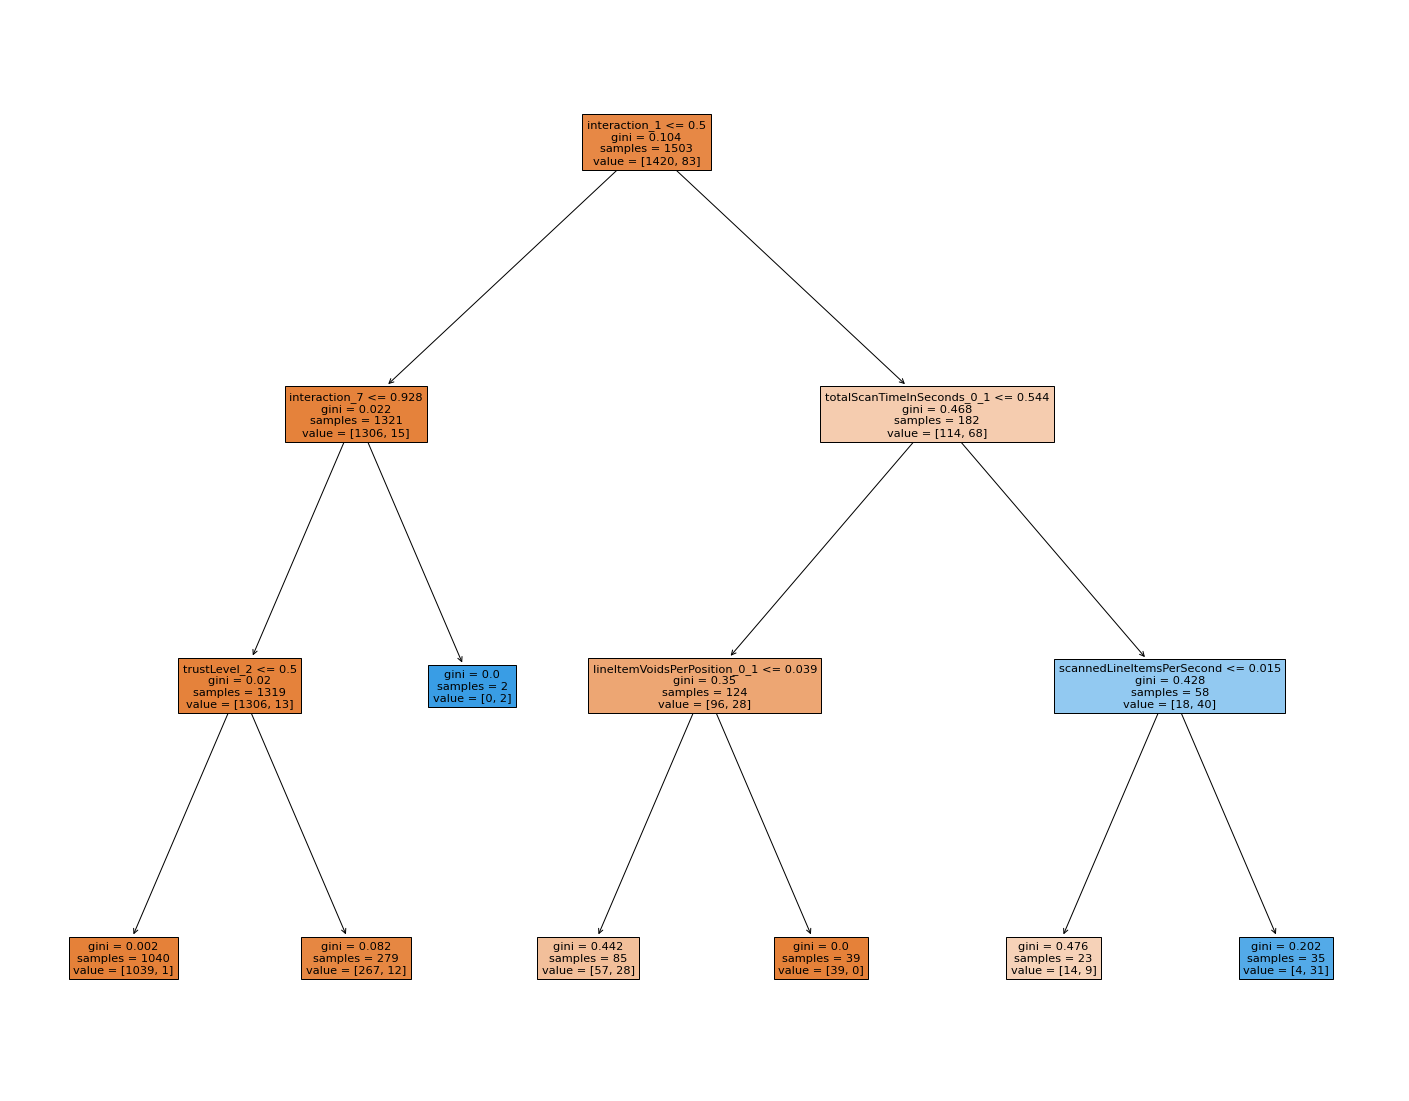

In [7]:
# Selecting input and target variables
X = train.drop(['fraud'], axis = 1)
Y = train['fraud']

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

# Building the decision tree on train data-frame
tree_md = DecisionTreeClassifier(max_depth = 3).fit(X_train, Y_train)

# Visualizing the decision-tree model
fig = plt.figure(figsize = (25,20))
plot_tree(tree_md, feature_names = X.columns, filled = True) 

In [8]:
train['interaction_9'] = np.where(train['heredity_1'] > 0.5, 1, 0)

In [9]:
# Selecting input and target variables
X = train.drop(['fraud'], axis = 1)
Y = train['fraud']

nsim = 2
cv = 5
test = Feature_Importance_Funs.RF_Feature_Importance(X, Y, nsim, cv)

In [10]:
feature_importance = pd.DataFrame({'Features': X.columns, 'Importance': test.apply(np.mean, axis = 0)})
feature_importance['Importance'] = round(feature_importance['Importance'], 4) * 100
feature_importance = feature_importance.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)
feature_importance.head(3)

,Features,Importance
0,interaction_9,11.81
1,heredity_1,11.67
2,interaction_1,11.21


In [11]:
train.shape

(1879, 45)